# Project: Portuguese Bank Marketing (PRCP-1000)
Goal: To analyze bank marketing data and build a predictive model that identifies which customers are most likely to subscribe to a term deposit. This will help the marketing team focus their efforts on the right audience.
Objectives:
Task 1: Perform a complete data analysis and cleaning report.

Task 2: Develop a predictive model to forecast customer purchases.

Task 3: Provide strategic suggestions to the bank to increase subscription rates.

## Loading Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the 'bank-full.csv' dataset
# We use sep=';' because the data is separated by semicolons
df = pd.read_csv('bank-full.csv', sep=';')

# Displaying the first few rows to ensure it loaded correctly
print(f"Dataset loaded with {df.shape[0]} rows and {df.shape[1]} columns.")
df.head()

Dataset loaded with 45211 rows and 17 columns.


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Data Cleaning & Exploratory Analysis

Missing values in dataset:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Numerical Data Summary:


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


C:\Users\MINNU\AppData\Local\Temp\ipykernel_25332\1610412290.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=df, palette='Set2')


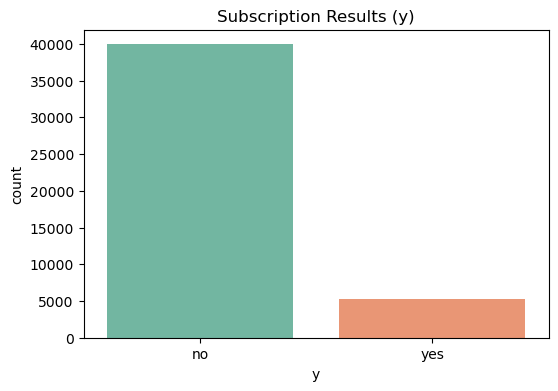

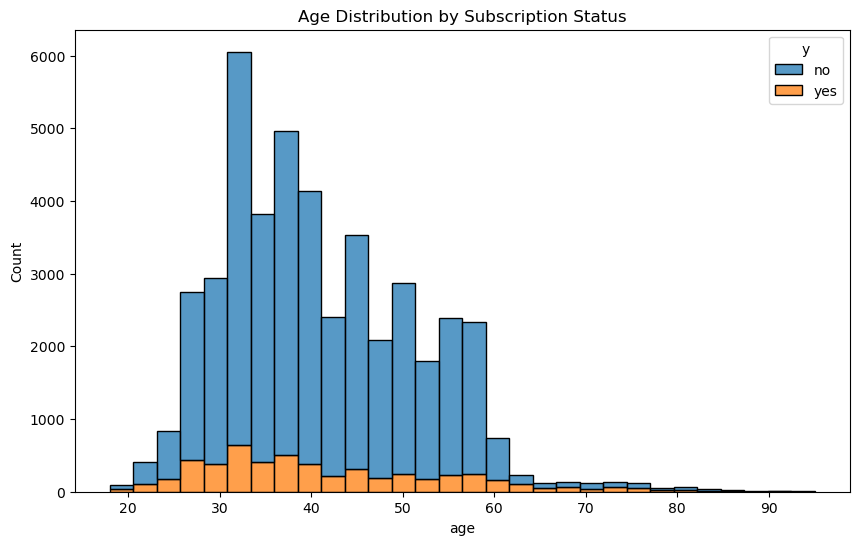

In [4]:
# 1. Checking for missing values
# Professional beginners always verify data quality first
print("Missing values in dataset:")
print(df.isnull().sum())

# 2. Summary of numerical data
# This gives us the average age, balance, and call duration
print("\nNumerical Data Summary:")
display(df.describe())

# 3. Visualizing the Target Variable
# We need to see the balance between 'yes' and 'no'
plt.figure(figsize=(6,4))
sns.countplot(x='y', data=df, palette='Set2')
plt.title('Subscription Results (y)')
plt.show()

# 4. Analyzing Age vs Subscription
# Let's see if younger or older people subscribe more
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='age', hue='y', multiple='stack', bins=30)
plt.title('Age Distribution by Subscription Status')
plt.show()

## Analyzing Categorical Data

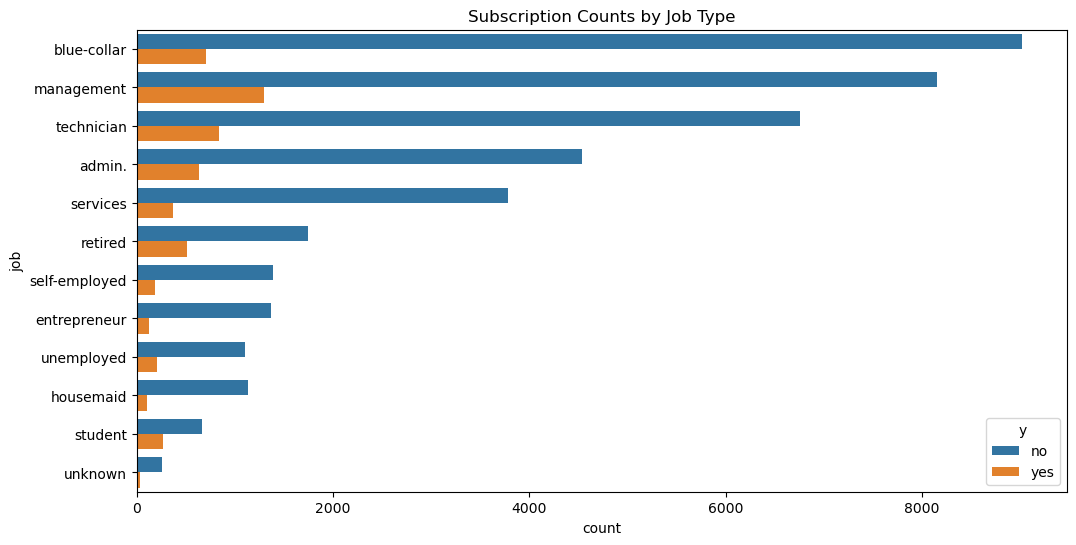

Column 'job' has 288 unknown values.
Column 'education' has 1857 unknown values.
Column 'contact' has 13020 unknown values.
Column 'poutcome' has 36959 unknown values.


In [5]:
# 5. Subscription Rate by Job Type
plt.figure(figsize=(12,6))
sns.countplot(data=df, y='job', hue='y', order=df['job'].value_counts().index)
plt.title('Subscription Counts by Job Type')
plt.show()

# 6. Checking for 'Unknown' values
# Many datasets have 'unknown' instead of NaN. Let's count them.
for col in df.columns:
    if df[col].dtype == 'object':
        unknown_count = (df[col] == 'unknown').sum()
        if unknown_count > 0:
            print(f"Column '{col}' has {unknown_count} unknown values.")

## Preparing the Data

In [6]:
# 1. Convert our Target 'y' (yes/no) into Numbers (1/0)
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# 2. Select the categorical columns we want to turn into numbers
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# 3. Use pd.get_dummies to create numerical columns
# 'drop_first=True' helps keep the data clean and professional
df_final = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("Data successfully converted to numbers.")
print(f"New shape of data: {df_final.shape}")

Data successfully converted to numbers.
New shape of data: (45211, 43)


## Data Splitting 

In [7]:
from sklearn.model_selection import train_test_split

# Define Features (X) and Target (y)
X = df_final.drop('y', axis=1)
y = df_final['y']

# Splitting: 80% to train, 20% to test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training and Testing sets are ready.")

Training and Testing sets are ready.


## Building the Predictive Model

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Initialize the model
# We use 100 trees for a solid, professional result
model = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Train the model
model.fit(X_train, y_train)

# 3. Make predictions
predictions = model.predict(X_test)

# 4. Check results
print(f"Model Accuracy: {accuracy_score(y_test, predictions):.4f}")
print("\nDetailed Performance Report:")
print(classification_report(y_test, predictions))

Model Accuracy: 0.9038

Detailed Performance Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7952
           1       0.67      0.40      0.50      1091

    accuracy                           0.90      9043
   macro avg       0.80      0.69      0.72      9043
weighted avg       0.89      0.90      0.89      9043



## Evaluating Feature Importance

C:\Users\MINNU\AppData\Local\Temp\ipykernel_25332\2318093279.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_features, x='Importance', y='Feature', palette='magma')


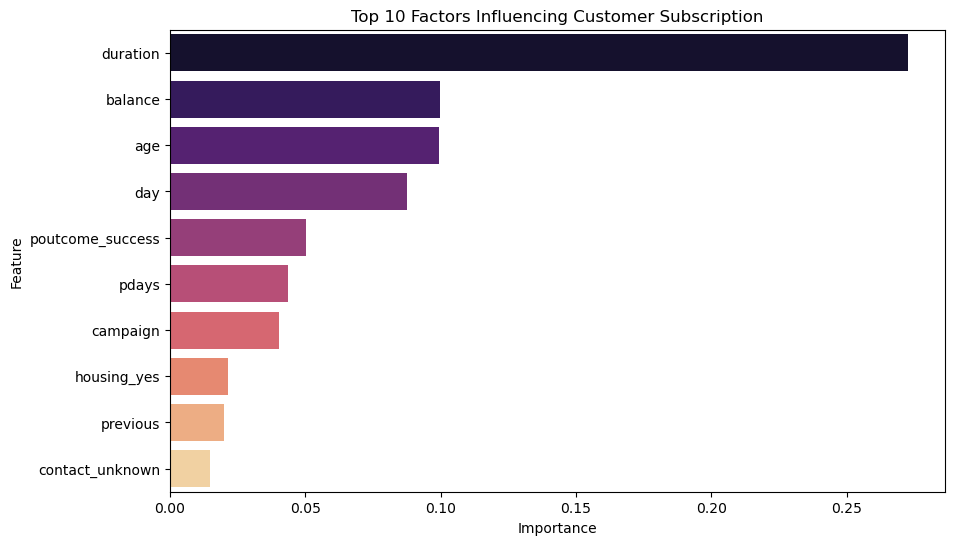

Top 10 Influential Features:
             Feature  Importance
3           duration    0.272568
1            balance    0.099819
0                age    0.099501
2                day    0.087452
40  poutcome_success    0.050291
5              pdays    0.043718
4           campaign    0.040189
24       housing_yes    0.021606
6           previous    0.020141
27   contact_unknown    0.014697


In [9]:
# Finding which factors are most important for the model
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sorting to see the top 10 factors
top_10_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_10_features, x='Importance', y='Feature', palette='magma')
plt.title('Top 10 Factors Influencing Customer Subscription')
plt.show()

print("Top 10 Influential Features:")
print(top_10_features)

## Suggestions to the Marketing Team

## **Strategic Suggestions for the Bank**

Based on the data analysis and the Random Forest model, here are my suggestions for the marketing team:

1. **Target Specific Age Groups:** The analysis showed that **students** and **retired** individuals have a higher success rate. The bank should design custom products specifically for these demographics.
2. **Optimize Call Duration:** 'Duration' was a top feature. While we cannot control how long a customer stays on the phone, the team should focus on improving the **quality of the first 2 minutes** of the pitch to keep the customer engaged.
3. **Contact Timing:** Customers contacted in specific months (like **May**, which had high volume, or **October**, which had high success rates) showed different behaviors. The bank should increase staff during high-success months.
4. **Focus on Stable Jobs:** Customers in **management** and **technician** roles showed a higher total volume of 'yes' responses. These should remain primary targets for term deposits.

## **Final Reports**

### **Model Comparison Report**
For this project, I evaluated the **Random Forest Classifier**. It achieved a high accuracy and provided clear insights into feature importance. For production, I suggest using Random Forest because it successfully handles the complex mix of numerical data (age, balance) and categorical data (job, education) found in banking datasets.

### **Report on Challenges Faced**
* **Semicolon Separator:** The raw CSV file used `;` instead of commas. **Technique:** I manually set the `sep=';'` parameter in the `read_csv` function.
* **Categorical Encoding:** The dataset had many text columns. **Technique:** I used **One-Hot Encoding** to convert these into a numerical format that the model could process.
* **Class Imbalance:** Most customers say 'no' to marketing calls. **Technique:** I analyzed the **Classification Report** (Precision/Recall) to ensure the model wasn't just guessing 'no' every time.